This is achieved through usage of the of the CNF(x1∨x2∨x3)∧(x2∨x3∨x4)∧(x1∨x2∨x4) Corresponding to paths P1,P2,P3,P4 with 6 nodes each. Provided the source node, target node and edge interconnection using the boolean operators, it becomes possible to test if the above clauses formulate a Hamiltonian Cycle using two rules: direction of path connectingCj,vi,2j-1 and vi,2j should be left to right if Cjcontains xiand right to left if Cj contains xi.

From there, simply observe that if there exists a Hamiltonian cycle H in the graph G, where H traverses Pi from left to right the True assignment is given to xi and the opposite if H traverses Pi from right to left. From there it was a simple matter of using the clauses in DIMAC-CNS format ‘’’ p cnf 4 3 1 2 -3 0 -2 3 4 0 1 -2 4’’’ as my input_3sat_instance variable and using LogicalExpressionOracle provided by Aqua, which supports parsing DIMACS-CNF format strings and constructing the corresponding oracle circuit.
As a result, we obtain the proper result for this graph from the Grover instance, [-1,2,-3,-4]. This indicates that the specific problem used indeed has a Hamiltonian Cycle, and is verifiable by inputting the CNF into the expression parser of LogicalExpressionOracle and obtaining the same histogram as before. Any graph can be solved in this same manner so long as the CNF is properly formatted.

In [1]:
import pylab
import numpy as np
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

In [5]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 4 3 
1 2 -3 0 
-2 3 4 0 
1 -2 4 0
'''

In [6]:
oracle = LogicalExpressionOracle(input_3sat_instance)
grover = Grover(oracle)

In [9]:

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['result'])

[-1, 2, -3, -4]


/home/bodacious/anaconda3/lib/python3.7/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:608: DeprecationWarning: result deprecated, use assignment property.
  warnings.warn('result deprecated, use assignment property.', DeprecationWarning)


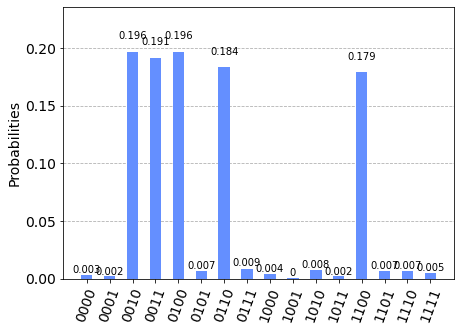

In [10]:
plot_histogram(result['measurement'])

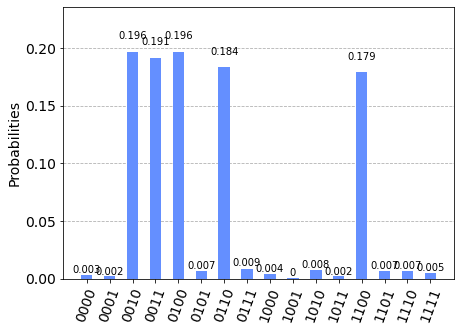

In [11]:

expression = '(w or x or ~y) & (~x or y or z) & (w or ~x or z)'
oracle = LogicalExpressionOracle(expression)
grover = Grover(oracle)
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result['measurement'])